p.101
# 과제: 100개의 임의 점 좌표에 대해 5-최근접 이웃 구하기 및 시각화

## 과제 설명

### 1. 목표: 100개의 임의의 2차원 좌표에 대해 각 점의 5-최근접 이웃을 찾아 시각화하는 프로그램을 작성.

### 2. 조건:
거리: 유클리드 거리 제곱을 사용하여 각 점 간의 거리를 계산.
출력: 각 점에 대해 가장 가까운 5개의 이웃 좌표를 출력.
시각화: 각 좌표와 해당 좌표에 가까운 5개의 이웃을 스캐터 플롯으로 시각화. (점마다 이웃 관계를 선으로 연결하여 표시)




In [9]:
data = np.random.randint(0, 10, (5,2))
data

array([[2, 8],
       [1, 1],
       [1, 5],
       [2, 8],
       [3, 0]], dtype=int32)

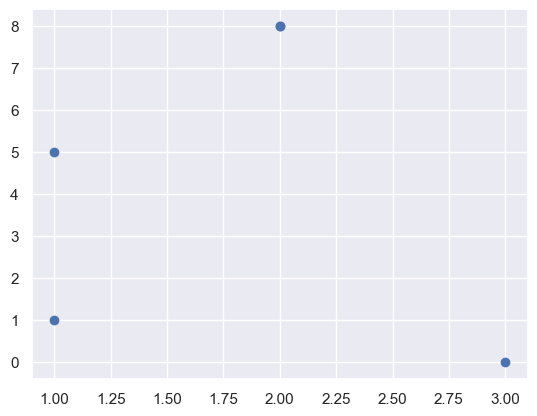

In [10]:
plt.scatter(data[:,0], data[:,1])

In [12]:
data.shape, data

((5, 2),
 array([[2, 8],
        [1, 1],
        [1, 5],
        [2, 8],
        [3, 0]], dtype=int32))

In [14]:
data[:, None, :].shape,  data[None,:,:].shape

((5, 1, 2), (1, 5, 2))

In [16]:
(data[:, None, :] - data[None,:,:]).shape

(5, 5, 2)

In [ ]:
import numpy as np
np.sum(np.sqrt((np.array([1,4])-np.array([2,2])**2)),axis=2)

C:\Users\user\AppData\Local\Temp\ipykernel_5268\1009362957.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.array([1,4])-np.array([2,2])**2)


array([nan,  0.])

3. 단계별 요구 사항

## 3.1 난수 좌표 생성:
[0, 1) 범위에서 100개의 2차원 좌표를 생성.



In [3]:
x = np.random.rand(100)
y = np.random.rand(100)

x.shape, y.shape

((100,), (100,))

In [ ]:
points = list(zip(x, y))
points

In [9]:
points = np.concatenate([x[:,None], y[:, None]], axis=1)
points.shape

(100, 2)

In [26]:
import numpy as np

np.random.rand(100, 2).shape

(100, 2)

In [27]:
A = np.arange(1, 4)
A.shape, A

((3,), array([1, 2, 3]))

In [28]:
B = np.arange(1, 4)[:, None]
B.shape, B

((3, 1),
 array([[1],
        [2],
        [3]]))

In [29]:
# A = (1, 3)
# B = (3, 1)

A - B

array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0]])

In [15]:
x = np.random.rand(100)
x.shape

(100,)

In [16]:
y = np.random.rand(100).reshape(100, 1)
y.shape

(100, 1)

In [ ]:
def f(x, y):
    return np.sqrt((x - y)**2)

(100, 100)

In [12]:
np.broadcast_to(A, (3, 3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [13]:
np.broadcast_to(B, (3, 3))

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [34]:
points = np.random.rand(10, 2)

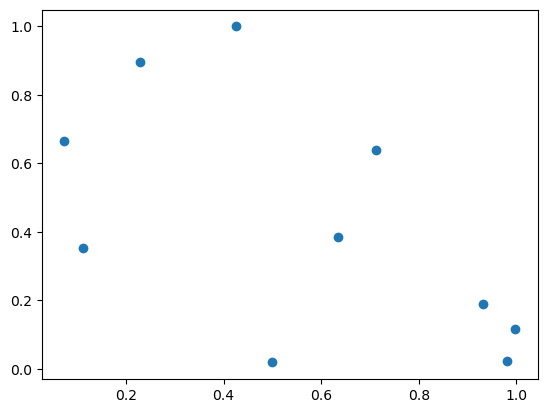

In [35]:
import matplotlib.pyplot as plt

plt.scatter(points[:,0], points[:,1])

## 3.2 거리 행렬 계산:

각 점 간의 유클리드 거리 제곱을 계산하여 100x100 크기의 거리 행렬을 생성.

In [38]:
points = np.random.rand(10, 2)
points[None, :, :].shape, points[:, None, :].shape

((1, 10, 2), (10, 1, 2))

In [53]:
points = np.random.rand(10, 2)
points.shape, points[:, None, :].shape

((10, 2), (10, 1, 2))

In [54]:
d = points - points[:, None, :]
d.shape

(10, 10, 2)

In [55]:
d = (points - points[:, None, :])
d.shape

(10, 10, 2)

In [59]:
d = np.sqrt(np.sum((points - points[:, None, :])**2, axis=2))
d

array([[0.        , 0.75316332, 0.2765868 , 0.39186239, 0.87784314,
        0.81765984, 0.31911266, 0.42075669, 0.50957857, 0.47028307],
       [0.75316332, 0.        , 0.50045135, 0.58289796, 0.14077547,
        0.31163876, 0.43902595, 1.1037008 , 0.54752868, 0.3557191 ],
       [0.2765868 , 0.50045135, 0.        , 0.20818768, 0.63485951,
        0.63810783, 0.07338973, 0.68469371, 0.29296156, 0.19396288],
       [0.39186239, 0.58289796, 0.20818768, 0.        , 0.72366142,
        0.79132781, 0.2641626 , 0.810551  , 0.12027908, 0.22825243],
       [0.87784314, 0.14077547, 0.63485951, 0.72366142, 0.        ,
        0.26890745, 0.57015167, 1.2077931 , 0.68563871, 0.49643626],
       [0.81765984, 0.31163876, 0.63810783, 0.79132781, 0.26890745,
        0.        , 0.56477692, 1.07101464, 0.79373336, 0.57433529],
       [0.31911266, 0.43902595, 0.07338973, 0.2641626 , 0.57015167,
        0.56477692, 0.        , 0.70834278, 0.32934045, 0.17534787],
       [0.42075669, 1.1037008 , 0.6846937

In [58]:
from sklearn.metrics import pairwise_distances

points = np.random.rand(10, 2)
pairwise_distances(points)

array([[0.        , 0.75316332, 0.2765868 , 0.39186239, 0.87784314,
        0.81765984, 0.31911266, 0.42075669, 0.50957857, 0.47028307],
       [0.75316332, 0.        , 0.50045135, 0.58289796, 0.14077547,
        0.31163876, 0.43902595, 1.1037008 , 0.54752868, 0.3557191 ],
       [0.2765868 , 0.50045135, 0.        , 0.20818768, 0.63485951,
        0.63810783, 0.07338973, 0.68469371, 0.29296156, 0.19396288],
       [0.39186239, 0.58289796, 0.20818768, 0.        , 0.72366142,
        0.79132781, 0.2641626 , 0.810551  , 0.12027908, 0.22825243],
       [0.87784314, 0.14077547, 0.63485951, 0.72366142, 0.        ,
        0.26890745, 0.57015167, 1.2077931 , 0.68563871, 0.49643626],
       [0.81765984, 0.31163876, 0.63810783, 0.79132781, 0.26890745,
        0.        , 0.56477692, 1.07101464, 0.79373336, 0.57433529],
       [0.31911266, 0.43902595, 0.07338973, 0.2641626 , 0.57015167,
        0.56477692, 0.        , 0.70834278, 0.32934045, 0.17534787],
       [0.42075669, 1.1037008 , 0.6846937

In [52]:
np.argsort(d)

array([[0, 5, 4, 1, 7, 6, 8, 9, 2, 3],
       [1, 5, 0, 8, 6, 4, 7, 3, 2, 9],
       [2, 9, 8, 1, 7, 3, 0, 5, 6, 4],
       [3, 8, 6, 1, 5, 2, 0, 9, 7, 4],
       [4, 0, 5, 7, 1, 9, 6, 8, 2, 3],
       [5, 0, 1, 4, 6, 7, 8, 3, 9, 2],
       [6, 3, 8, 5, 1, 0, 4, 2, 7, 9],
       [7, 9, 0, 4, 1, 5, 2, 8, 6, 3],
       [8, 3, 1, 6, 2, 5, 0, 9, 7, 4],
       [9, 2, 7, 1, 0, 8, 4, 5, 3, 6]], dtype=int64)

In [50]:
data = np.random.rand(10)
data

array([0.10747072, 0.53482865, 0.48899658, 0.73044657, 0.09488453,
       0.30155786, 0.50093485, 0.96834425, 0.77651748, 0.26665473])

In [51]:
np.argsort(data)

array([4, 0, 9, 5, 2, 6, 1, 3, 8, 7], dtype=int64)

3.3 5-최근접 이웃 찾기:
각 점에 대해 가장 가까운 5개의 점을 거리 순으로 정렬.
자기 자신을 제외하고 가장 가까운 5개의 이웃.



3.4 결과 출력:
각 점에 대해 가장 가까운 5개의 이웃의 좌표와 거리 제곱을 출력.



3.5 시각화:
matplotlib를 사용하여 각 점과 해당 점의 5-최근접 이웃을 플롯.
각 점은 scatter로 표시하고, 가까운 이웃과 연결하는 선을 추가하여 관계를 시각적으로 표현.